In [87]:
# Load libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [49]:
# Load dataset
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

In [50]:
# shape
print(dataset.shape)

(150, 5)


In [51]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [52]:
# describe
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [53]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


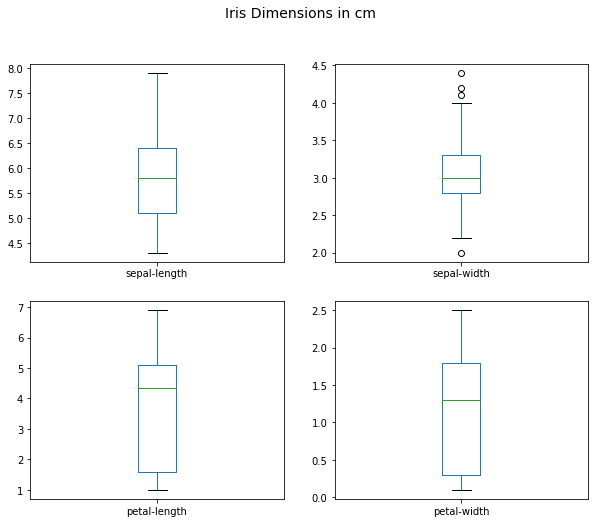

In [54]:
# box and whisker plots
dataset.plot.box(subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10,8))
plt.suptitle('Iris Dimensions in cm', fontsize=14)
plt.show()

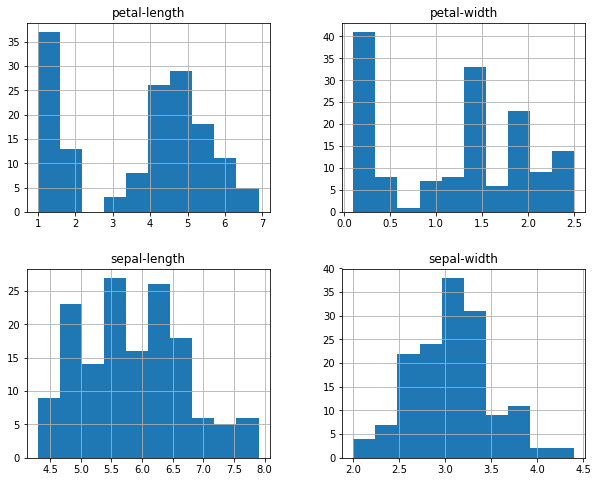

In [55]:
# histograms
dataset.hist(figsize=(10,8))
plt.show()

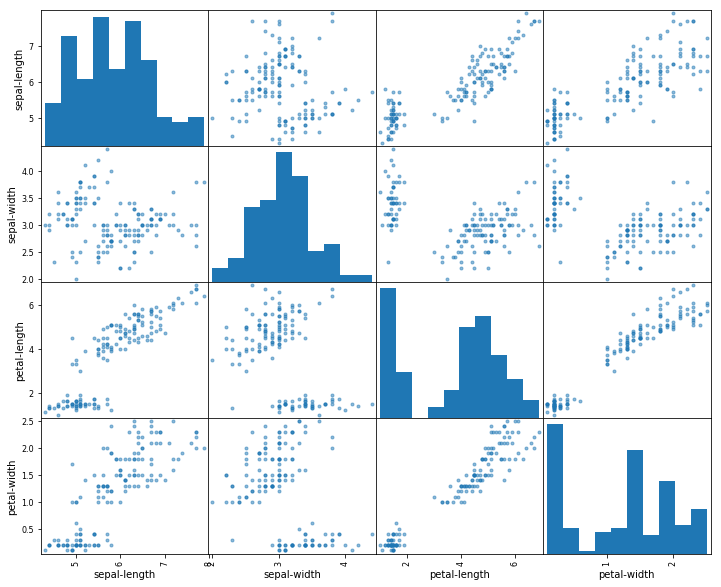

In [56]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(12,10))
plt.show()

In [57]:
# Split-out validation dataset
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [58]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [76]:
# evaluate each model in turn
results = []
names = []
accuracy_scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    accuracy_scores.append(cv_results.mean())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [91]:
df_scores = pd.DataFrame({'model': names, 'accuracy_score': accuracy_scores})
df_scores = df_scores[['model', 'accuracy_score']]
df_scores.sort_values(by='accuracy_score', ascending=False, inplace=True)
df_scores.index = range(len(df_scores))

In [92]:
df_scores

,model,accuracy_score
0,SVM,0.991667
1,KNN,0.983333
2,CART,0.983333
3,LDA,0.975000
4,NB,0.975000
5,LR,0.966667


In [73]:
# Make predictions on validation dataset
s = SVC()
s.fit(X_train, Y_train)
predictions = s.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



In [74]:
# Make dataframe of the validation data set's class and the prediction's class
results = pd.DataFrame({'class': Y_validation, 'prediction': predictions})


def status(row):
    if row['class'] == row['prediction']:
        return 'same'
    else:
        return 'different'


results['status'] = results.apply(status, axis='columns')

In [75]:
results

,class,prediction,status
0,Iris-virginica,Iris-virginica,same
1,Iris-versicolor,Iris-versicolor,same
2,Iris-setosa,Iris-setosa,same
3,Iris-versicolor,Iris-versicolor,same
4,Iris-virginica,Iris-virginica,same
5,Iris-setosa,Iris-setosa,same
6,Iris-versicolor,Iris-versicolor,same
7,Iris-versicolor,Iris-versicolor,same
8,Iris-setosa,Iris-setosa,same
9,Iris-versicolor,Iris-versicolor,same
